data source : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes  import  MultinomialNB 
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [2]:
data = pd.read_csv("/AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
data.shape

(48895, 16)

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Dropping unnecessary columns

In [5]:
data.drop(['name','id','host_name','last_review','reviews_per_month'], axis=1, inplace=True)

In [6]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Data visuallization

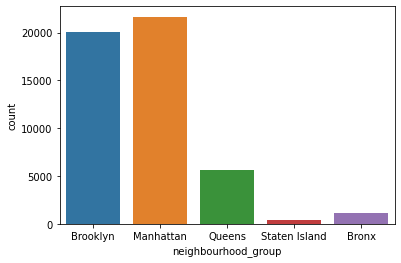

In [8]:
sns.countplot(x="neighbourhood_group", data=data)

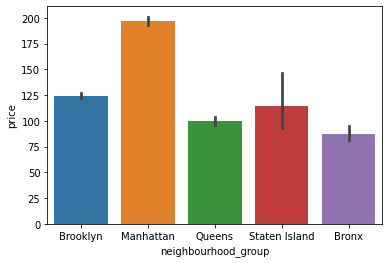

In [9]:
sns.barplot(y="price", x="neighbourhood_group", data=data)

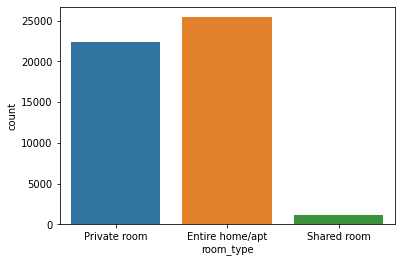

In [10]:
sns.countplot(x="room_type", data=data)

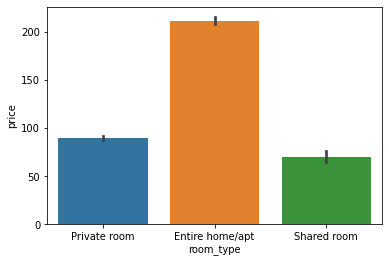

In [11]:
sns.barplot(y="price", x="room_type", data=data)

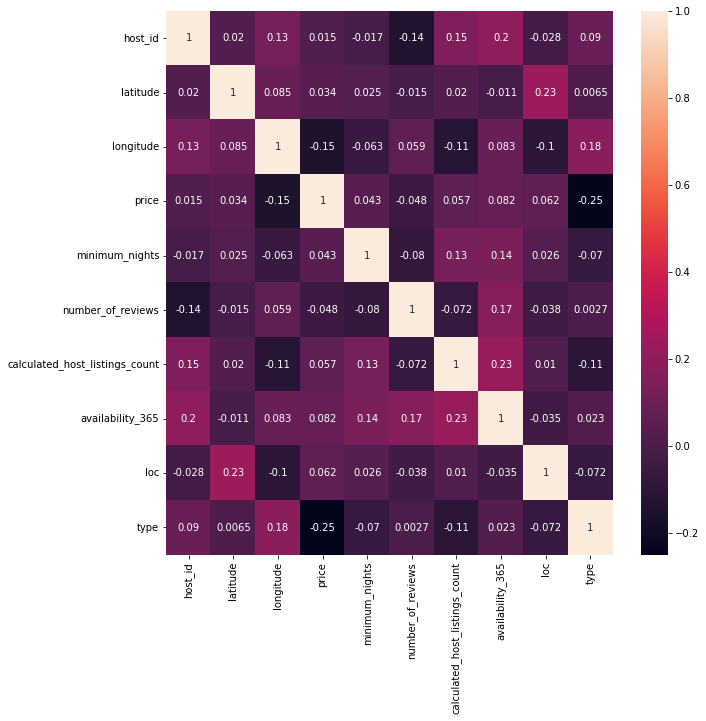

In [21]:
#Correalation matrix

corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

Encoding categorical variables

In [13]:
class_le = LabelEncoder()

In [14]:
data["loc"] = class_le.fit_transform(data["neighbourhood"].values)
data["type"] = class_le.fit_transform(data["room_type"].values)

In [46]:
X = data.drop(["host_id","room_type","neighbourhood","number_of_reviews","neighbourhood_group","latitude","longitude","price"],axis=1)

Y = data["price"]
X.head()

,minimum_nights,calculated_host_listings_count,availability_365,loc,type
0,1,6,365,108,1
1,1,2,355,127,0
2,3,1,365,94,1
3,1,1,194,41,0
4,10,1,0,61,0


Split dataset into train and test sets

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)


**Modelling**

Linear Regression

In [30]:
lr = LinearRegression().fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))

200.27267094613097


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


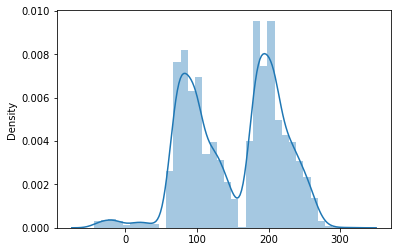

In [35]:
sns.distplot(pred_lr)

In [41]:
err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_lr)
err.head(10)

,actual,prediction
0,89,219.033665
1,30,105.062859
2,120,78.905433
3,470,247.757599
4,199,186.066364
5,170,211.141823
6,90,99.217683
7,60,201.707268
8,150,209.522738
9,74,214.415047


In [31]:
dt = DecisionTreeRegressor().fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_dt)))

234.60578769285905


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


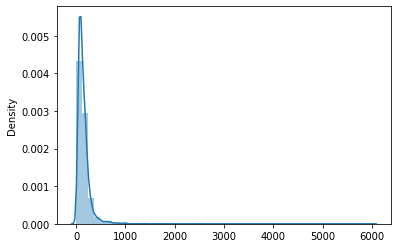

In [34]:
sns.distplot(pred_dt)

In [42]:
err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_dt)
err.head(10)

,actual,prediction
0,89,125.000000
1,30,63.000000
2,120,126.461538
3,470,231.000000
4,199,275.000000
5,170,165.000000
6,90,70.254237
7,60,100.000000
8,150,310.000000
9,74,151.000000


Prediction using only the neighbourhood and the room type

In [47]:
X1 = X[["loc","type"]]

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2, random_state=42)

In [55]:
lr = LinearRegression().fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))

201.29824066174362


In [58]:
err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_lr)
err.head(10)

,actual,prediction
0,89,208.226444
1,30,109.133785
2,120,97.992123
3,470,202.734076
4,199,200.850978
5,170,224.860475
6,90,116.666177
7,60,198.183256
8,150,219.211182
9,74,221.408129


In [56]:
dt = DecisionTreeRegressor().fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_dt)))

196.97521788048925


In [57]:
err = pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
err['prediction']=np.array(pred_dt)
err.head(10)

,actual,prediction
0,89,137.927273
1,30,56.215596
2,120,132.954887
3,470,243.769397
4,199,195.669251
5,170,204.955195
6,90,86.192817
7,60,135.857143
8,150,342.510204
9,74,140.571429
